# **Surajustement et Sous-ajustement**
Améliorer les performances avec une capacité supplémentaire ou un arrêt précoce.

## Introduction
Rappelons-nous de l'exemple dans la leçon précédente que Keras conserve un historique de la perte d'entraînement et de validation au fil des époques pendant lesquelles il entraîne le modèle. Dans cette leçon, nous allons apprendre à interpréter ces courbes d'apprentissage et comment nous pouvons les utiliser pour guider le développement du modèle. En particulier, nous examinerons les courbes d'apprentissage pour détecter des signes de **sous-ajustement** et de **surajustement**, et nous verrons quelques stratégies pour les corriger.

## **Interprétation des Courbes d'Apprentissage**
Vous pouvez considérer les informations dans les données d'entraînement comme étant de deux types : le **signal** et le **bruit**. 
- Le **signal** est la partie qui généralise, la partie qui peut aider notre modèle à faire des prédictions à partir de nouvelles données.
- Le **bruit** est la partie qui est uniquement vraie pour les données d'entraînement ; le bruit représente toutes les fluctuations aléatoires qui proviennent des données du monde réel ou tous les motifs accidentels et non informatifs qui ne peuvent pas réellement aider le modèle à faire des prédictions. Le bruit est la partie qui peut sembler utile mais qui ne l'est pas vraiment.

**Nous entraînons un modèle en choisissant des poids ou des paramètres qui minimisent la perte sur un ensemble d'entraînement**. Cependant, vous savez peut-être que pour évaluer avec précision les performances d'un modèle, nous devons l'évaluer sur un nouvel ensemble de données, les données de validation. (Vous pouvez consulter notre leçon sur la validation des modèles dans l'introduction au Machine Learning pour un rappel.)

Lorsque nous entraînons un modèle, nous avons tracé la perte sur l'ensemble d'entraînement époque par époque. À cela, nous ajouterons un tracé des données de validation également. Ces graphiques, nous les appelons **les courbes d'apprentissage**. Pour entraîner efficacement des modèles de **deep learning**, nous devons être capables de les interpréter.

*Un graphique de la perte d'entraînement et de validation.*

La perte de validation donne une estimation de l'erreur attendue sur des données invisibles.
Maintenant, **la perte d'entraînement diminuera soit lorsque le modèle apprend le signal, soit lorsqu'il apprend le bruit**. Mais **la perte de validation ne diminuera que lorsque le modèle apprend le signal**. (Tout bruit que le modèle a appris à partir de l'ensemble d'entraînement ne se généralisera pas à de nouvelles données.) Ainsi, lorsque le modèle apprend le signal, les deux courbes descendent, mais lorsqu'il apprend le bruit, un écart se crée entre les courbes. La taille de cet écart vous indique combien de bruit le modèle a appris.

Idéalement, **nous créerions des modèles qui apprennent tout le signal et aucun bruit**. Cela ne se produira pratiquement jamais. Au lieu de cela, nous faisons un compromis. Nous pouvons amener le modèle à apprendre plus de signal au prix d'apprendre plus de bruit. Tant que le compromis est en notre faveur, la perte de validation continuera à diminuer. Cependant, après un certain point, le compromis peut se retourner contre nous, le coût dépasse le bénéfice, et la perte de validation commence à augmenter.

Deux graphiques. À gauche, une ligne passant par quelques points de données avec l'ajustement réel étant une parabole. À droite, une courbe passant par chaque point de données avec l'ajustement réel étant une parabole.

##### Sous-ajustement et surajustement.
Ce compromis indique qu'il peut y avoir deux problèmes lors de l'entraînement d'un modèle : pas assez de signal ou trop de bruit. 
- Le **sous-ajustement** de l'ensemble d'entraînement se produit lorsque la perte n'est pas aussi faible qu'elle pourrait l'être parce que le modèle n'a pas appris assez de signal.
- Le **surajustement** de l'ensemble d'entraînement se produit lorsque la perte n'est pas aussi faible qu'elle pourrait l'être parce que le modèle a appris trop de bruit.

L'astuce pour entraîner des modèles de deep learning est de trouver le meilleur équilibre entre les deux.

Nous allons examiner quelques moyens d'obtenir plus de signal à partir des données d'entraînement tout en réduisant la quantité de bruit.

## **Capacité**
La capacité d'un modèle fait référence à la taille et à la complexité des motifs qu'il est capable d'apprendre. Pour les **réseaux de neurones**, cela sera largement déterminé par le nombre de neurones qu'il possède et la manière dont ils sont connectés entre eux. Si votre réseau semble sous-ajuster les données, vous devriez essayer d'augmenter sa capacité.

Vous pouvez augmenter la capacité d'un réseau soit en le rendant plus **large** (plus d'unités dans les couches existantes), soit en le rendant plus **profond** (en ajoutant plus de couches). Les réseaux plus larges ont plus de facilité à apprendre des relations plus linéaires, tandis que les réseaux plus profonds préfèrent des relations plus non linéaires. Lequel est le meilleur dépend simplement du jeu de données.

```python
model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(1),
])

wider = keras.Sequential([
    layers.Dense(32, activation='relu'),
    layers.Dense(1),
])

deeper = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1),
])
```
Vous explorerez comment la capacité d'un réseau peut affecter ses performances dans l'exercice.

## **Arrêt Précoce**
Nous avons mentionné que lorsqu'un modèle apprend trop avidement le bruit, la perte de validation peut commencer à augmenter pendant l'entraînement. Pour éviter cela, nous pouvons simplement arrêter l'entraînement dès qu'il semble que la perte de validation ne diminue plus. Interrompre l'entraînement de cette manière s'appelle l'**arrêt précoce**.

Un graphique des courbes d'apprentissage avec un arrêt précoce au minimum de la perte de validation, **sous-ajustement à gauche et surajustement à droite**.
Nous conservons le modèle là où la perte de validation est à son minimum.
Une fois que nous détectons que la perte de validation commence à remonter, nous pouvons réinitialiser les poids à l'endroit où le minimum s'est produit. Cela garantit que le modèle ne continuera pas à apprendre du bruit et à surajuster les données.

L'entraînement avec arrêt précoce signifie également que nous sommes moins en danger d'arrêter l'entraînement trop tôt, avant que le réseau ait fini d'apprendre le signal. Ainsi, en plus de prévenir le surajustement dû à un entraînement trop long, l'arrêt précoce peut également prévenir le sous-ajustement dû à un entraînement trop court. **Il suffit de définir vos époques d'entraînement à un nombre élevé (plus que nécessaire), et l'arrêt précoce s'occupera du reste**.

## **Ajout de l'Arrêt Précoce**
Dans Keras, nous incluons l'arrêt précoce dans notre entraînement via un **callback**. Un callback est simplement une fonction que vous souhaitez exécuter de temps en temps pendant que le réseau s'entraîne. Le callback d'arrêt précoce s'exécutera après chaque époque. (Keras a une variété de callbacks utiles prédéfinis, mais vous pouvez également définir les vôtres.)

```python
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    min_delta=0.001, # changement minimum pour compter comme une amélioration
    patience=20, # nombre d'époques à attendre avant d'arrêter
    restore_best_weights=True,
)
```

Ces paramètres disent : "*S'il n'y a pas eu au moins une amélioration de 0,001 dans la perte de validation au cours des 20 dernières époques, alors arrêtez l'entraînement et conservez le meilleur modèle que vous avez trouvé.*" Il peut parfois être difficile de dire si la perte de validation augmente en raison d'un surajustement ou simplement en raison de variations aléatoires par lot. Les paramètres nous permettent de définir certaines tolérances autour du moment où arrêter.

Comme nous le verrons dans notre exemple, nous passerons ce **callback** à la méthode `fit` avec la **perte** et l'**optimiseur**.

---

### **Exemple - Entraîner un Modèle avec Arrêt Précoce**
Continuons à développer le modèle de l'exemple du dernier tutoriel, sur le jeu de données de la qualité de vin. Nous allons augmenter la capacité de ce réseau mais aussi ajouter un callback d'arrêt précoce pour éviter le surajustement.

Voici à nouveau la préparation des données.

In [23]:
import pandas as pd
from IPython.display import display

red_wine = pd.read_csv('red-wine.csv')

# Créer des ensembles d'entraînement et de validation
df_train = red_wine.sample(frac=0.7, random_state=0)
df_valid = red_wine.drop(df_train.index)
display(df_train.head(4))

# Mise à l'échelle à [0, 1]
max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)
df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)

# Séparer les caractéristiques et la cible
X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)
y_train = df_train['quality']
y_valid = df_valid['quality']

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1109,10.8,0.470,0.43,2.10,0.171,27.0,66.0,0.99820,3.17,0.76,10.8,6
1032,8.1,0.820,0.00,4.10,0.095,5.0,14.0,0.99854,3.36,0.53,9.6,5
1002,9.1,0.290,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7,7
487,10.2,0.645,0.36,1.80,0.053,5.0,14.0,0.99820,3.17,0.42,10.0,6


Maintenant, augmentons la capacité du réseau. Nous opterons pour un réseau assez large, mais nous nous appuierons sur **le callback pour arrêter l'entraînement une fois que la perte de validation montre des signes d'augmentation**.


In [27]:
from tensorflow import keras
from tensorflow.keras import layers, callbacks

early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # changement minimum pour compter comme une amélioration
    patience=20, # nombre d'époques à attendre avant d'arrêter
    restore_best_weights=True,
)

model = keras.Sequential([
    layers.Input(shape=[11]),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1),
])
model.compile(
    optimizer='adam',
    loss='mae',
)

Après avoir défini le callback, ajoutez-le comme argument dans `fit` (vous pouvez en avoir plusieurs, alors mettez-le dans une liste). Choisissez un grand nombre d'époques lorsque vous utilisez l'arrêt précoce, plus que nécessaire.


Minimum validation loss: 0.0920475497841835


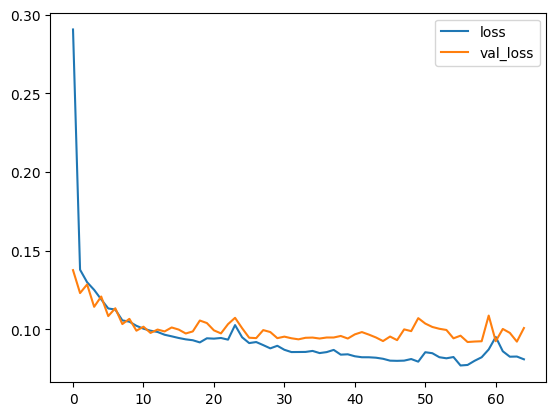

In [32]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=500,
    callbacks=[early_stopping], # mettez vos callbacks dans une liste
    verbose=0,  # désactivez le journal d'entraînement
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

Et effectivement, Keras a arrêté l'entraînement bien avant les 500 époques !

#### À Vous de Jouer
Maintenant, prédisez la popularité d'une chanson avec le jeu de données Spotify.

Vous avez des questions ou des commentaires ? Visitez le forum de discussion du cours pour discuter avec d'autres apprenants.

---
# **EXERCICE**
Dans cet exercice, vous apprendrez à améliorer les résultats de l'entraînement en incluant un **callback d'arrêt précoce** pour éviter le surajustement.

Quand vous êtes prêt, exécutez la cellule suivante pour tout configurer !


In [45]:
# Importation des bibliothèques pour l'affichage des graphiques

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")     # Changer le style de la figure
plt.rc('figure', autolayout=True)  # Ajustement automatique des figures
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('animation', html='html5')  # Configuration des animations


### Chargement des Données
Commencez par charger le jeu de données **Spotify**. Votre tâche sera de **prédire la popularité d'une chanson en fonction de diverses caractéristiques audio, telles que `tempo`, `danceability`, et `mode`.**

In [49]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import GroupShuffleSplit

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks

spotify = pd.read_csv('spotify.csv')

X = spotify.copy().dropna()
y = X.pop('track_popularity')
artists = X['track_artist']

features_num = ['danceability', 'energy', 'key', 'loudness', 'mode',
                'speechiness', 'acousticness', 'instrumentalness',
                'liveness', 'valence', 'tempo', 'duration_ms']
features_cat = ['playlist_genre']

preprocessor = make_column_transformer(
    (StandardScaler(), features_num),
    (OneHotEncoder(), features_cat),
)

# Nous allons faire une séparation "groupée" pour garder toutes les chansons d'un artiste dans un seul groupe.
# Cela permet d'éviter la fuite d'information.
def group_split(X, y, group, train_size=0.75):
    splitter = GroupShuffleSplit(train_size=train_size)
    train, test = next(splitter.split(X, y, groups=group))
    return (X.iloc[train], X.iloc[test], y.iloc[train], y.iloc[test])

X_train, X_valid, y_train, y_valid = group_split(X, y, artists)

X_train = preprocessor.fit_transform(X_train)
X_valid = preprocessor.transform(X_valid)
y_train = y_train / 100 # La popularité est sur une échelle de 0 à 100, donc on la redimensionne à 0-1.
y_valid = y_valid / 100

input_shape = [X_train.shape[1]]
print("Input shape: {}".format(input_shape))


Input shape: [18]


### Modèle Linéaire
Commençons avec le réseau le plus simple, un modèle linéaire. Ce modèle a une faible capacité.

Exécutez la cellule suivante sans aucune modification pour entraîner un modèle linéaire sur le jeu de données Spotify.

Minimum Validation Loss: 0.1992


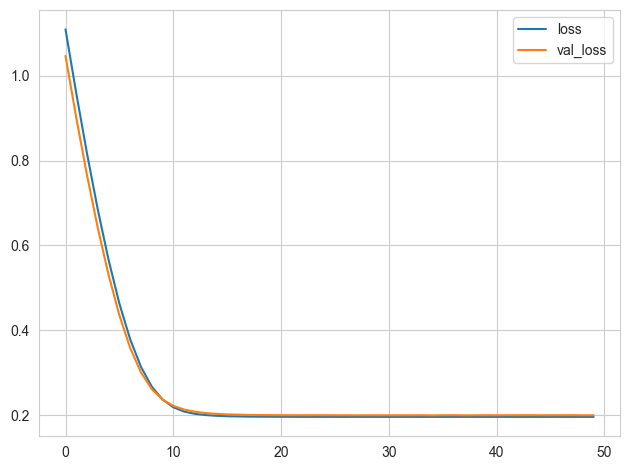

In [56]:
model = keras.Sequential([
    layers.Input(shape=input_shape),
    layers.Dense(1),
])
model.compile(
    optimizer='adam',
    loss='mae',
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=50,
    verbose=0, # Supprime la sortie car nous allons tracer les courbes
)
history_df = pd.DataFrame(history.history)
history_df.loc[0:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()))


### Analyse des Courbes
Il n'est pas rare que les courbes suivent un motif en "**crosse de hockey**" comme vous pouvez le voir ici. Cela rend difficile la visualisation de la dernière partie de l'entraînement, donc commençons à l'époque 10 à la place :


Minimum Validation Loss: 0.1992


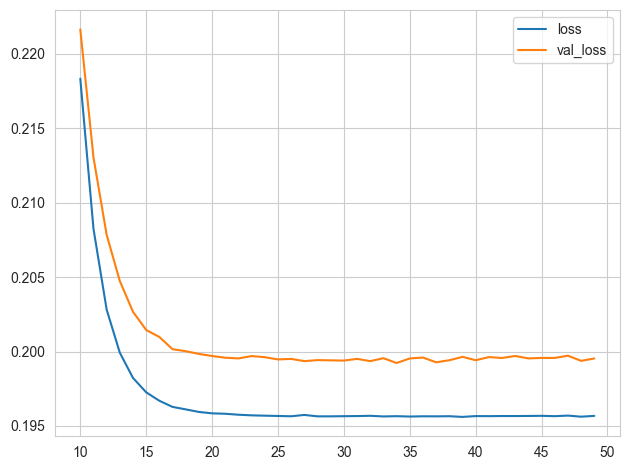

In [60]:
# Commencer le graphique à l'époque 10
history_df.loc[10:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()))




### Explication
- **Modèle Linéaire** : Le modèle utilisé ici est un simple réseau de neurones à une seule couche dense avec une seule unité de sortie. Cela en fait un modèle linéaire, car il ne peut apprendre que des relations linéaires entre les caractéristiques et la cible.
- **Courbes d'Apprentissage** : Les courbes de perte d'entraînement et de validation montrent comment le modèle performe au fil des époques. Une perte de validation élevée par rapport à la perte d'entraînement peut indiquer un sous-ajustement.
- **Arrêt Précoce** : Dans les exercices suivants, vous ajouterez un callback d'arrêt précoce pour éviter que le modèle ne surajuste les données.

Cet exercice vous permet de comprendre les bases de l'entraînement d'un modèle simple et de visualiser les performances à l'aide des courbes d'apprentissage.

---
## Question 1 : Évaluer le Modèle de Base
**Qu'en pensez-vous ? Diriez-vous que ce modèle est en sous-ajustement, en surajustement, ou bien ajusté ?**

**Réponse Correcte :**

L'écart entre ces courbes est assez faible et la perte de validation n'augmente jamais, il est donc plus probable que le réseau soit en sous-ajustement plutôt qu'en surajustement. Il serait intéressant d'expérimenter avec une plus grande capacité pour voir si c'est le cas.


### Ajout de Capacité au Réseau
Maintenant, ajoutons de la capacité à notre réseau. Nous allons ajouter trois couches cachées avec 128 unités chacune. Exécutez la cellule suivante pour entraîner le réseau et observer les courbes d'apprentissage.


Epoch 1/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.2800 - val_loss: 0.2106
Epoch 2/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2024 - val_loss: 0.2051
Epoch 3/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1959 - val_loss: 0.2016
Epoch 4/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1913 - val_loss: 0.2021
Epoch 5/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1897 - val_loss: 0.1996
Epoch 6/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1877 - val_loss: 0.1993
Epoch 7/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1867 - val_loss: 0.1993
Epoch 8/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1841 - val_loss: 0.1998
Epoch 9/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1837 - val_loss: 0.1993
Epoch 10/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1834 - val_loss: 0.2001
Epoch 11/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1820 - val_loss: 0.2005
Epoch 12/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1805 - val_l

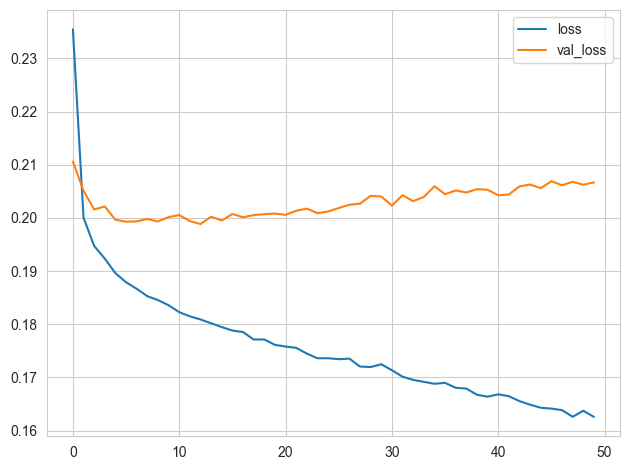

In [67]:
model = keras.Sequential([
    layers.Input(shape=input_shape),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])
model.compile(
    optimizer='adam',
    loss='mae',
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=50,
)
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()))


---
### Question 2 : Ajout de Capacité
**Quelle est votre évaluation de ces courbes ? Sous-ajustement, surajustement, ou bien ajusté ?**

**Réponse Correcte :**

Maintenant, la perte de validation commence à augmenter très tôt, tandis que la perte d'entraînement continue de diminuer. Cela indique que le réseau a commencé à surajuster. À ce stade, nous devrions essayer quelque chose pour l'empêcher, soit en réduisant le nombre d'unités, soit en utilisant une méthode comme l'arrêt précoce. (Nous en verrons une autre dans la prochaine leçon !)

---
### Question 3 : Définir un Callback d'Arrêt Précoce
Maintenant, définissez un callback d'arrêt précoce qui attend 5 époques (`patience`) pour un changement dans la perte de validation d'au moins 0,001 (`min_delta`) et conserve les poids ayant la meilleure perte (`restore_best_weights`).


Ce callback est utile pour éviter le surajustement en arrêtant l'entraînement dès que la performance sur les données de validation cesse de s'améliorer.

In [71]:
from tensorflow.keras import callbacks

# VOTRE CODE ICI : définissez un callback d'arrêt précoce
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # changement minimum pour considérer une amélioration
    patience=5,      # nombre d'époques à attendre avant d'arrêter
    restore_best_weights=True, # restaure les poids ayant la meilleure perte
)


Maintenant, exécutez cette cellule pour entraîner le modèle et obtenir les courbes d'apprentissage. Notez l'argument callbacks dans model.fit.

Epoch 1/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.3000 - val_loss: 0.2118
Epoch 2/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2034 - val_loss: 0.2068
Epoch 3/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1977 - val_loss: 0.2047
Epoch 4/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1929 - val_loss: 0.2020
Epoch 5/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1901 - val_loss: 0.2012
Epoch 6/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1891 - val_loss: 0.2004
Epoch 7/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1872 - val_loss: 0.1996
Epoch 8/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.1861 - val_loss: 0.1995
Epoch 9/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1848 - val_loss: 0.2001
Epoch 10/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1845 - val_loss: 0.1992
Epoch 11/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1823 - val_loss: 0.2003
Epoch 12/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1836 - val_

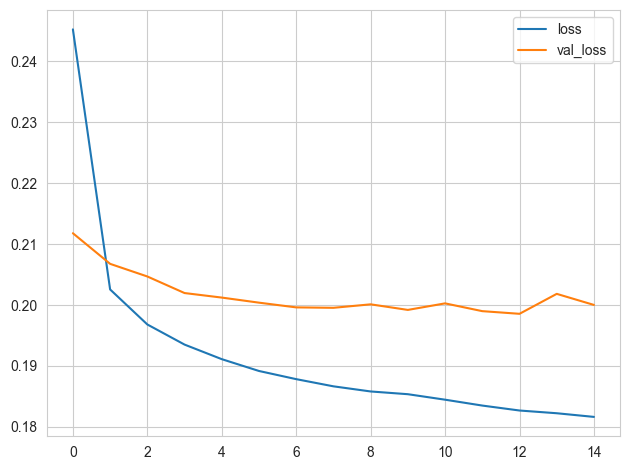

In [74]:
model = keras.Sequential([
    layers.Input(shape=input_shape),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),    
    layers.Dense(1)
])
model.compile(
    optimizer='adam',
    loss='mae',
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=50,
    callbacks=[early_stopping]  # Utilisation du callback d'arrêt précoce
)
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print("Perte de validation minimale : {:0.4f}".format(history_df['val_loss'].min()))

---
### Question 4 : Entraînement et Interprétation
**Cela a-t-il été une amélioration par rapport à l'entraînement sans arrêt précoce ?**

**Réponse Correcte :**

Le callback d'arrêt précoce a bien interrompu l'entraînement une fois que le réseau a commencé à surajuster. De plus, en incluant `restore_best_weights`, nous conservons le modèle au point où la perte de validation était la plus faible.

Si vous le souhaitez, essayez d'expérimenter avec les paramètres `patience` et `min_delta` pour voir quelle différence cela pourrait faire.